In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pylab

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)


# Central limit theorem


- In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

- The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

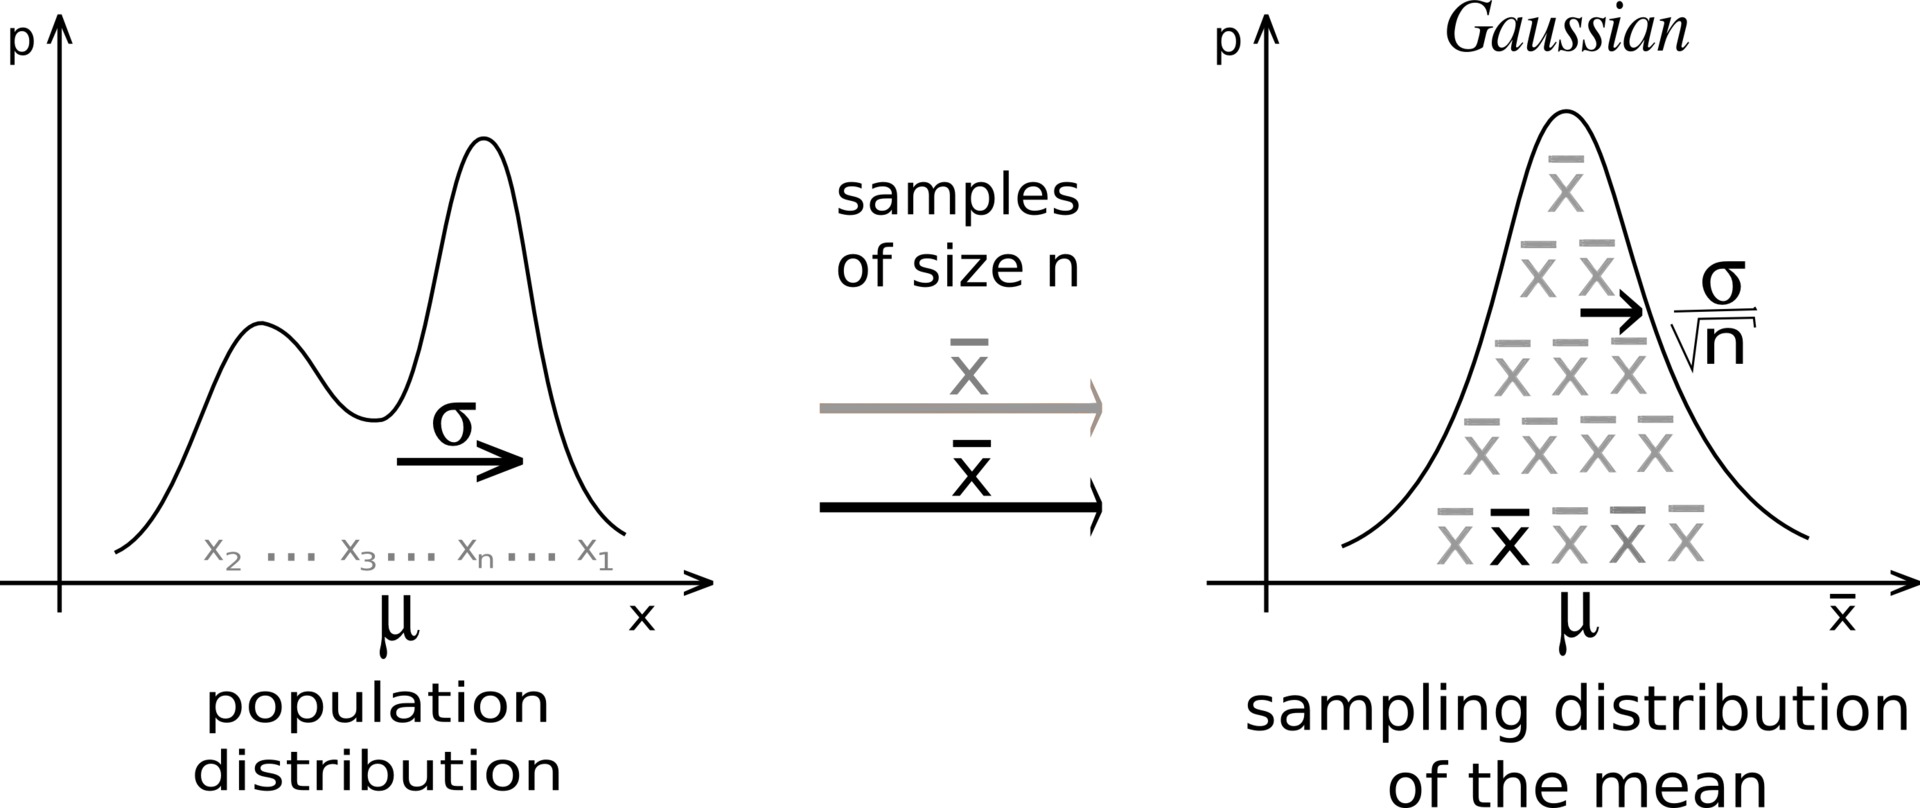

if there is a random variable called X :

    X can be height / weight / ... 
    with some finite pop mean and standard deviation (known)
    from any distribution  , guassian or not. 
    
    from this dist , 
    if we take mutiple samples of size n : 
        
        Dn1 = {x1 , x2 , x3 ,..... ,xn}   # first sample!
        compute mean of Dn1.
    
    such we take total r samples. ,(and take means of all samples)
    Dn1 , Dn2 ,.....Dnr. 
    these sample means will fall into normal distribution.(sampling distribution)
    
    Xbar = x1bar + ...+xnbar
    who's mean will be same as population mean . 
    
    and the standard deviation of sampling distribution is called standard error of mean. 
    

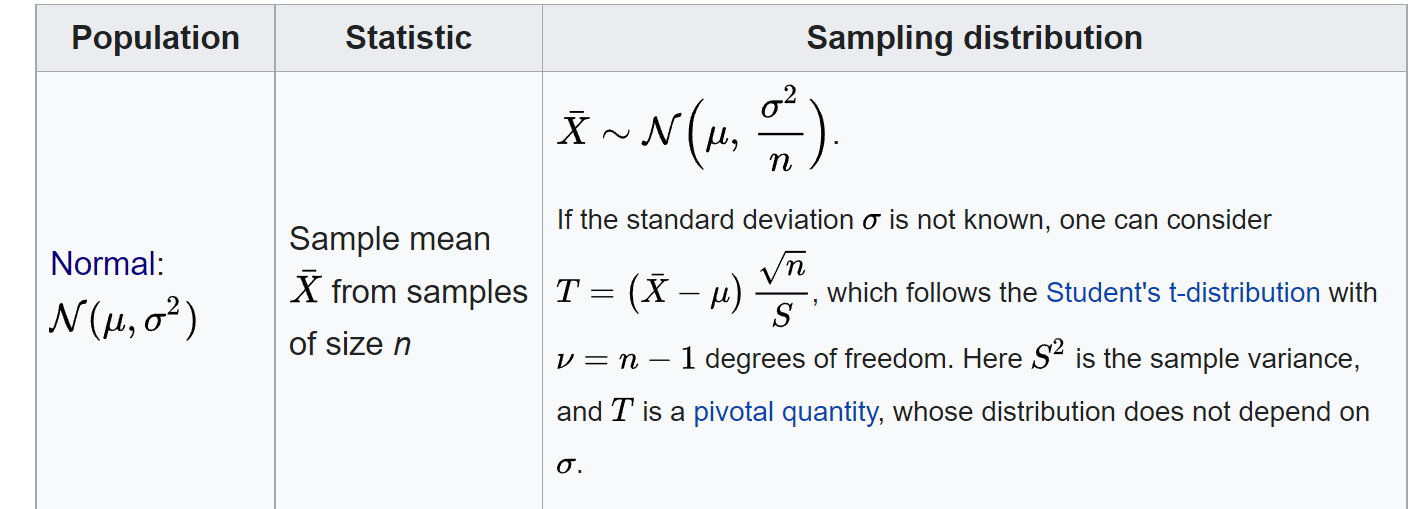

##  Confidence Interval of travel time for one particular location pair! 

In [3]:
df = pd.read_csv("uber_travel_data.csv")

In [5]:
df.sample(100).head(10)

,sourceid,source,dstid,destination,travel_time
3234599,205,"2100 Gali Number 14, Block B, Prem Nagar, Pate...",215,"Unnamed Road, Bagiabad, Jharoda Majra Burari, ...",1888
3586873,227,"300 Lok Marg, Dhaka Colony, Mukherjee Nagar, D...",226,"Unnamed Road, Model Town, Delhi",564
2097224,135,"0 Uggarsen Market Road, Meenakshi Garden, Asho...",15,"H205, Block H, Sarojini Nagar, New Delhi",2349
3435473,218,"nullTandoor Wali Gali, Swami Shraddhanand Park...",288,NaN,1574
3640227,230,"N494, Block N, Raghubir Nagar, Tagore Garden E...",256,"D-70, Mahavir Enclave I, Mahavir Enclave Part ...",1946
2318356,148,"Unnamed Road, Patparganj, New Delhi",243,NaN,4816
3024516,192,"0 Bhartendu Harish Chandra Marg, Ram Vihar, An...",84,"nullMathura Road, Friends Colony West, Block A...",1827
2509142,160,"23, Shiva Enclave, Pitampura, Delhi",246,"nullShiv Mandir Marg, Block G, Lajpat Nagar I,...",2889
3210373,204,"0 East Patel Nagar Road, Block 10A, East Patel...",97,NaN,1484
2727606,173,"Unnamed Road, Swarn Jayanti Park, Sector 10, R...",135,"0 Uggarsen Market Road, Meenakshi Garden, Asho...",1816


In [6]:
df.shape

(4542026, 5)

<AxesSubplot:>

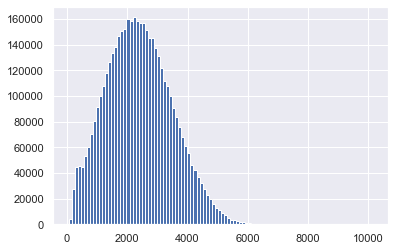

In [7]:
df["travel_time"].hist(bins = 100)

In [ ]:
# data is right skeweded.

<AxesSubplot:xlabel='travel_time', ylabel='Density'>

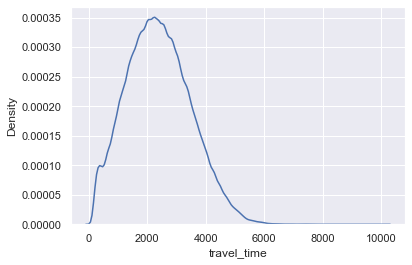

In [8]:
sns.kdeplot(df["travel_time"])

In [ ]:
# if we want to know for a particular source and destination 

In [10]:
df.value_counts(["sourceid","dstid"]).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

min 50 and max is 79 of data for each locations 

lets take one pair of data : 

In [12]:
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]

In [14]:
data.shape

(75,)

<AxesSubplot:>

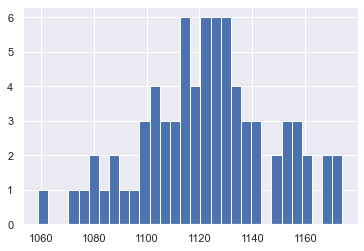

In [18]:
data.hist(bins = 30)

In [ ]:
# 95% CI of mean Destination from 1 to 5. 
# above selected data . 

In [ ]:
# take multiple sample with replacement (bootstrapping)

- r : number of resampling that i want to do
- sample_size : bootstrap sample be ofthis sample size 

In [36]:
r = 10000
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]
sample_size = 70
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data,size = sample_size)
    bs_means[i] = np.mean(bs_sample)
        



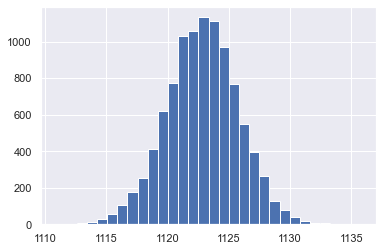

In [37]:
plt.hist(bs_means,bins= 30)
plt.show()

<AxesSubplot:ylabel='Density'>

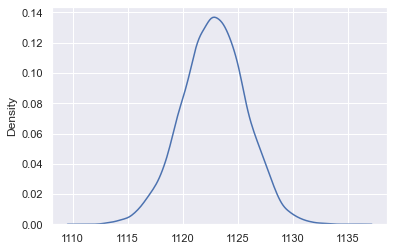

In [38]:
sns.kdeplot(bs_means)

In [39]:
print(np.mean(bs_means)) # sample mean
print(np.std(bs_means))  # standard error of mean

1122.8339285714285
2.9233517377580585


In [40]:
np.std(data)/np.sqrt(sample_size) # standard error of mean

2.930411531855508

In [41]:
np.mean(bs_means) - 1.95*np.std(bs_means),np.mean(bs_means) + 1.95* np.std(bs_means)

(1117.1333926828004, 1128.5344644600566)

In [42]:
np.percentile(bs_means,2.5),np.percentile(bs_means,97.5)

(1116.942857142857, 1128.4432142857142)

### find 95% CI on 99th pecentile value for travel time via bootstrapping

In [44]:
r = 10000
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]
sample_size = 70
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data,size = sample_size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [46]:
print(np.percentile(bs_99p,2.5),(np.percentile(bs_99p,97.5)))

1161.0 1174.0


In [47]:
np.percentile(bs_99p,99)

1174.0

<AxesSubplot:ylabel='Density'>

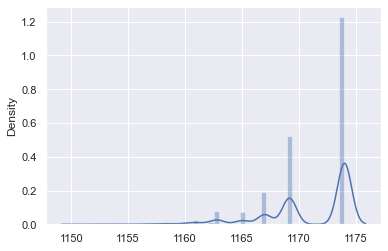

In [50]:
 sns.distplot(bs_99p) # CLT not applicable for other than means

In [57]:
t.ppf(1-(1-(95/100))/2,70-1)

1.9949454146328136

In [56]:
1-(1-(95/100))/2

0.975

In [62]:
def bootstrpping_Confidence_interval(data,r=1000,sample_size = 70,confidence=95):    

    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data,size = sample_size)
        bs_means[i] = np.mean(bs_sample)

#     print(np.mean(bs_means)) # sample mean
#     print(np.std(bs_means))  # standard error of mean
    
    tvalue = t.ppf(1-(1-(confidence/100))/2,sample_size-1)
    
    
    np.std(data)/np.sqrt(sample_size) # standard error of mean
    lower = np.mean(bs_means) - tvalue*np.std(bs_means)
    upper = np.mean(bs_means) + tvalue* np.std(bs_means)
    
    print("Sample Mean : ",np.mean(bs_means))
    print("Standard Error :",np.std(bs_means))
    print("Confidence Interval :",lower,upper)
    print("Margin of Error :",tvalue*np.std(bs_means))
    


In [71]:
bootstrpping_Confidence_interval(df["travel_time"],r = 100, sample_size=10000)

Sample Mean :  2392.183302
Standard Error : 11.584960122891923
Confidence Interval : 2369.474448528104 2414.892155471896
Margin of Error : 22.708853471895786


In [77]:
(0.95*0.50)/(0.475+0.75*0.50)

0.5588235294117647

In [78]:
(0.50*0.90) + (0.50*0.75)

0.825